# chapter 13 in chapter exercises

In [1]:
# import libraries and define global settings
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 13.1: Visualization of confidence intervals

In [3]:
# a population and its mean
popdata = np.random.randn(100000) + 2
popmean = np.mean(popdata)

In [4]:
# samples and their confidence intervals
nSamples   = 20
sampleSize = 50

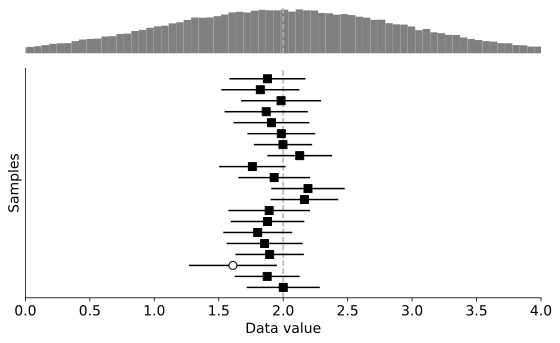

In [5]:
# setup the figure
fig = plt.figure(figsize=(8,5))
gs = plt.GridSpec(5,1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1:])

# draw the population distribution and its mean
ax1.hist(popdata,bins='fd',color='gray')
ax1.axvline(x=popmean,linestyle='--',color=(.7,.7,.7))
ax2.axvline(x=popmean,linestyle='--',color=(.7,.7,.7))

# run the experiment
for i in range(nSamples):

  # draw a sample
  sample = np.random.choice(popdata,sampleSize,replace=False)

  # compute its mean and stdev
  mean = np.mean(sample)
  sem  = np.std(sample,ddof=1) / np.sqrt(sampleSize)

  # confidence interval from scipy
  CI = stats.t.interval(.95,sampleSize-1,loc=mean,scale=sem)

  # plot it
  if popmean>CI[0] and popmean<CI[1]:
    c,s = 'k','s'
  else:
    c,s = 'w','o'
  ax2.errorbar(mean,i,xerr=mean-CI[0],color='k',marker=s,markerfacecolor=c,markersize=8)



ax1.set_xlim([0,4])
ax1.axis('off')

ax2.set_ylabel('Samples')
ax2.set_yticks([])
ax2.set_xlim([0,4])
ax2.set_xlabel('Data value')

# display the figure
plt.tight_layout()
plt.show()

### Fig 13.2: confidence interval vs standard deviation

In [6]:
sampleSizes = [100,1000]
confLevel = .95


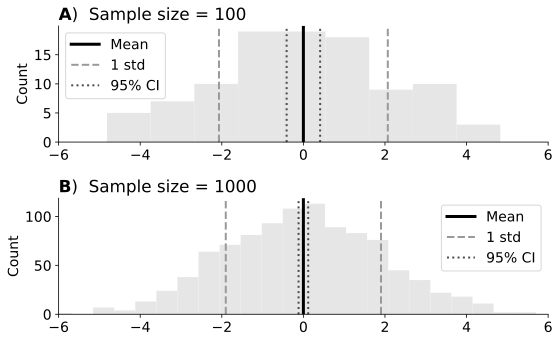

In [7]:
_,axs = plt.subplots(2,1,figsize=(8,5))


for ax,N,t in zip(axs,sampleSizes,['A','B']):

  # Generate a random sample of size N
  data = np.random.randn(N)*2
  # force the mean to be zero
  data -= np.mean(data)

  # mean and standard deviation
  mean = np.mean(data)
  stdev = np.std(data,ddof=1)

  # Calculate 95% confidence interval
  stderr = stdev / np.sqrt(len(data))
  conf_interval = stats.t.interval(confLevel, N-1, loc=mean, scale=stderr)




  # Plot the histogram
  ax.hist(data,bins='fd',color=(.9,.9,.9))

  # Plot the mean
  ax.axvline(mean,color='k',linewidth=3,label='Mean')

  # one standard deviation of the mean
  ax.axvline(mean-stdev,color=(.6,.6,.6),linewidth=2,linestyle='--',label='1 std')
  ax.axvline(mean+stdev,color=(.6,.6,.6),linewidth=2,linestyle='--')

  # Plot the confidence interval
  ax.axvline(conf_interval[0],color=(.3,.3,.3),linewidth=2,linestyle=':', label='95% CI')
  ax.axvline(conf_interval[1],color=(.3,.3,.3),linewidth=2,linestyle=':')

  ax.set(xlim=[-6,6],ylabel='Count')
  ax.set_title(rf'$\bf{{{t}}}$)  Sample size = {N}')
  ax.legend()


# display the figure
plt.tight_layout()
plt.show()

### Analytic confidence interval

In [7]:
conflevel = .95
n = 20
tStar = stats.t.isf((1-conflevel)/2,n-1)
print(tStar)

2.093024054408263


In [8]:
# simulation parameters
mean = 2.3
stdev = 3.2
N = 48
conflevel = .95

# confidence interval from formula
tStar = stats.t.isf((1-conflevel)/2,N-1)
conf_int_me = [ mean - tStar*(stdev/np.sqrt(N)), \
                mean + tStar*(stdev/np.sqrt(N)) ]

# confidence interval from scipy
conf_int_sp = stats.t.interval(confLevel,N-1,
                               loc=mean,scale=stdev/np.sqrt(N))

print(conf_int_me)
print(conf_int_sp)

[1.3708168597897181, 3.2291831402102815]
(1.3708168597897181, 3.2291831402102815)


### Bootstrapping

In [9]:
S = [1,2,3,4]
S = [2,2,3,3]

print('    Sample    |  Mean')
print('----------------------')
print(f'{S}  |  {np.mean(S):.2f}')

for i in range(5):

  # bootstrap a random sample
  b = np.random.choice(S,len(S),replace=True)
  # note: replace=True is the default setting; I set it here to emphasize its importance.

  # and print it and its mean
  print(f'{list(np.sort(b))}  |  {np.mean(b):.2f}')



    Sample    |  Mean
----------------------
[2, 2, 3, 3]  |  2.50
[2, 3, 3, 3]  |  2.75
[2, 2, 3, 3]  |  2.50
[2, 3, 3, 3]  |  2.75
[2, 2, 2, 3]  |  2.25
[3, 3, 3, 3]  |  3.00


In [10]:
# to compute n-choose-k combinations
from scipy.special import comb
comb(3,3,repetition=True)

10.0

### Empirical confidence intervals

In [11]:
# parameters
samplesize = 50

# draw a random sample from the population
dataSample = np.random.randn(samplesize)**2
dataSample -= np.mean(dataSample)

numboots = np.arange(50,5051,step=200)
CIs = np.zeros((len(numboots),2))
bmm = np.zeros(len(numboots))

for i,nb in enumerate(numboots):
  bootmeans = [np.mean(np.random.choice(dataSample,samplesize)) for booti in range(nb)]
  CIs[i,:] = np.percentile(bootmeans,[2.5,97.5])
  bmm[i] = np.mean(bootmeans)


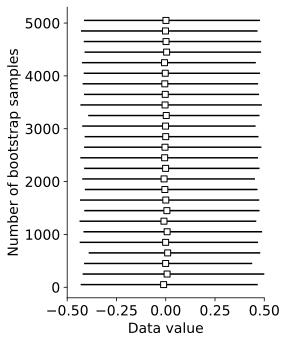

In [14]:
# plot
plt.figure(figsize=(4,5))
plt.errorbar(bmm, numboots, xerr=[bmm-CIs[:,0],CIs[:,1]-bmm],
             marker='s', color='k', markerfacecolor='w', linestyle='None')
plt.xlim([-.5,.5])

plt.ylabel('Number of bootstrap samples')
plt.xlabel('Data value')

plt.tight_layout()
plt.show()



### CI for hypothesis testing

In [15]:
# simulation parameters
mean = 1.3
stdev = 5.2
N = 48
conflevel = .95

# confidence interval from scipy
confint = stats.t.interval(confLevel,N-1,loc=mean,scale=stdev/np.sqrt(N))

print(confint)



(-0.20992260284170783, 2.809922602841708)


### Fig 13.4: Qualitative interpretation of confidence intervals

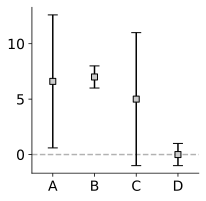

In [16]:
eSizes = [6,1,6,1]
means = [6.6,7,5,0]

plt.figure(figsize=(3,3))
plt.errorbar(range(4),means,eSizes,marker='s',color='k', markerfacecolor=(.8,.8,.8),capsize=5,linestyle='None')
plt.axhline(y=0,color=(.7,.7,.7),linestyle='--',zorder=-1)
plt.xticks(range(4),labels=['A','B','C','D'])
plt.xlim([-.5,3.5])


plt.show()

